In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Import the CSV Data as Pandas DataFrame


In [130]:
df = pd.read_csv(r"C:\Users\delve\OneDrive\Desktop\Projects\Default of Credit Card Clients\loan_revised.csv")

C:\Users\delve\AppData\Local\Temp\ipykernel_21312\1152413911.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\delve\OneDrive\Desktop\Projects\Default of Credit Card Clients\loan_revised.csv")


In [131]:
df.iloc[:,47].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

In [132]:
df.shape

(39717, 111)

In [133]:
# checking the dependant variable 
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [134]:
df["loan_status"].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

# 2. Handling non-standard values in columns:

# missing values

In [6]:
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [7]:
# Checking the unique values of each column:

for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].unique()[:20])
    print("\n" + "-"*50 + "\n")



Unique values in 'id':
[1077501 1077430 1077175 1076863 1075358 1075269 1069639 1072053 1071795
 1071570 1070078 1069908 1064687 1069866 1069057 1069759 1065775 1069971
 1062474 1069742]

--------------------------------------------------

Unique values in 'member_id':
[1296599 1314167 1313524 1277178 1311748 1311441 1304742 1288686 1306957
 1306721 1305201 1305008 1298717 1304956 1303503 1304871 1299699 1304884
 1294539 1304855]

--------------------------------------------------

Unique values in 'loan_amnt':
[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500]

--------------------------------------------------

Unique values in 'funded_amnt':
[ 5000  2500  2400 10000  3000  7000  5600  5375  6500 12000  9000  1000
  3600  6000  9200 20250 21000 15000  4000  8500]

--------------------------------------------------

Unique values in 'funded_amnt_inv':
[ 4975.       2500.       2400.      10000.       3000.       5

In [8]:
missing_data = df.isnull().sum()  # Count of missing values
missing_percentage = (df.isnull().mean() * 100)  # Percentage of missing values

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values Count': missing_data,
    'Missing Values Percentage': missing_percentage
})

# Optionally, you can sort the summary by the count of missing values
missing_summary = missing_summary.sort_values(by='Missing Values Count', ascending=False)

# Print the result
print(missing_summary)

                           Missing Values Count  Missing Values Percentage
verification_status_joint                 39717                      100.0
annual_inc_joint                          39717                      100.0
mo_sin_old_rev_tl_op                      39717                      100.0
mo_sin_old_il_acct                        39717                      100.0
bc_util                                   39717                      100.0
...                                         ...                        ...
delinq_amnt                                   0                        0.0
policy_code                                   0                        0.0
earliest_cr_line                              0                        0.0
delinq_2yrs                                   0                        0.0
id                                            0                        0.0

[111 rows x 2 columns]


In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().mean() * 100)

# Display columns where missing percentage is >= 90
threshold_percentage = 90
columns_to_drop = missing_percentage[missing_percentage >= threshold_percentage].index

# Optionally print columns to be dropped
print(f"Columns with missing values above {threshold_percentage}%: {columns_to_drop}")


Columns with missing values above 90%: Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 

In [10]:
# Drop columns in place (without assigning to df)
df.drop(columns=columns_to_drop, inplace=True)

# Now you can check the shape of the cleaned DataFrame
df.shape


(39717, 55)

# Dropping the rows for "current" in loan_status since current on-going loans cannot be indicative of future delinquencies 

In [11]:
# Filter the rows where loan_status is not "Current"
df_filtered = df[df["loan_status"] != "Current"]

# Calculate the number of rows deleted
rows_deleted = len(df) - len(df_filtered)

# Calculate the percentage of rows deleted
percent_deleted = round((rows_deleted * 100) / len(df), 2)

# Print the results
print(f"Total number of rows now = {len(df_filtered)} and the % of rows deleted is {percent_deleted}%")


Total number of rows now = 38577 and the % of rows deleted is 2.87%


In [12]:
df_filtered["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

# Duplicacies

In [13]:
duplicate_rows = len(df_filtered[df_filtered.duplicated()])
duplicate_rows

0

In [14]:
# ((df.isnull().sum()*100)/len(df)).sort_values(ascending = False)

df_filtered.isnull().mean().mul(100).loc[lambda x: x > 0].sort_values(ascending=False)

mths_since_last_delinq        64.559193
desc                          32.477901
emp_title                      6.185033
emp_length                     2.677761
pub_rec_bankruptcies           1.806776
last_pymnt_d                   0.184047
collections_12_mths_ex_med     0.145164
chargeoff_within_12_mths       0.145164
revol_util                     0.129611
tax_liens                      0.101097
title                          0.028514
last_credit_pull_d             0.005184
dtype: float64

Some more cleaning to be done

In [15]:
# Checking NA values
print("Total columns with values NA: ", len(df.columns[df.isna().all()].tolist()))
na_columns=list(df.columns[df_filtered.isna().all()])
print("NA colums List:")
na_columns

Total columns with values NA:  0
NA colums List:


[]

In [16]:
# Identify columns with unique values for every row
unique_columns = [col for col in df_filtered.columns if df_filtered[col].nunique() == len(df_filtered)]

# Print the list of columns with unique values
unique_columns


['id', 'member_id', 'url']

In [17]:
df_filtered.drop(['url','member_id'],axis=1)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [18]:
df_filtered.shape

(38577, 55)

# Dropping unncessary columns which do not contribute to predicitability

In [19]:
 
df_filtered.drop(columns=['title'],inplace=True)
df.shape

C:\Users\delve\AppData\Local\Temp\ipykernel_21312\725427126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['title'],inplace=True)


(39717, 55)

In [20]:
#Behavioural data is captured post loan approval and will not be available during the loan approval process. Hence removing these fields.
behavioural_cols=['delinq_2yrs', 'earliest_cr_line', 'last_pymnt_amnt','inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
                          'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp',
                          'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                        'application_type','last_pymnt_d','last_credit_pull_d']

df_filtered=df_filtered.drop(behavioural_cols,axis=1)

In [21]:
df_filtered.shape

(38577, 33)

In [22]:
df_filtered.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,mths_since_last_delinq,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,27.65,NaN,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.00,NaN,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,8.72,NaN,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,20.00,35.0,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,11.20,NaN,f,0.0,1,0,0.0,0,0.0,0.0


In [23]:
df_filtered.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
int_rate                        370
zip_code                        822
loan_amnt                       870
funded_amnt                    1019
dti                            2853
annual_inc                     5215
funded_amnt_inv                8050
installment                 

In [24]:
# Loop through columns and drop those with only one unique value
for column in df_filtered.columns:
    if df_filtered[column].nunique(dropna=True) == 1:
        print(column)
        df = df_filtered.drop(column, axis=1, inplace = True)

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


In [25]:
df_filtered.shape

(38577, 25)

# Data Conversion 

In [26]:
df_filtered.dtypes

id                          int64
member_id                   int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                   object
installment               float64
grade                      object
sub_grade                  object
emp_title                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
url                        object
desc                       object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
mths_since_last_delinq    float64
pub_rec_bankruptcies      float64
dtype: object

In [28]:
def clean_term(term):
    # If the term is a string, process it, otherwise return the integer
    if isinstance(term, str):
        return int(term.strip().split()[0])
    return term  # If it's already an integer, return it as is

df_filtered['term'] = df_filtered['term'].apply(clean_term)
df_filtered['term'].dtype  # Check the data type after conversion

df_filtered["term"].unique()

array([36, 60], dtype=int64)

In [29]:
print (df_filtered["int_rate"].unique())
print("\n","-"*50,"\n")
print(df_filtered["int_rate"].value_counts())

['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '20.89%' '20.30%' '23.91%' '19.03%' '23.13%' '22.74%' '22.35%'
 '22.06%' '24.11%' '6.00%' '23.52%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '19.29%'
 '13.99%' '18.39%' '16.89%' '17.99%' '20.99%' '22.85%' '19.69%' '20.62%'
 '20.25%' '21.36%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.40%' '21.48%' '14.82%' '14.17%'
 '7.29%' '17.88%' '20.11%' '16.02%' '13.43%' '14.91%' '13.06%' '15.28%'
 '15.65%' '17.14%' '11.11%' '10.37%' '16.40%' '17.51%' '7.66%' '18.6

In [30]:
# Convert int_rate fromns tring to float.
df_filtered['int_rate']=df_filtered['int_rate'].str.strip('%').astype(float)

In [31]:
df_filtered['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [32]:
# Column data type conversion to float64

df_filtered = df_filtered.astype({"loan_amnt":'float','funded_amnt':'float'})

print(df_filtered["funded_amnt"].dtype)
print(df_filtered["loan_amnt"].dtype)

float64
float64


In [33]:
# Round selected columns to 2 decimal places
df_filtered[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']] = df_filtered[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']].round(2)


print(df_filtered[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']])


       loan_amnt  funded_amnt  funded_amnt_inv  int_rate    dti
0         5000.0       5000.0           4975.0     10.65  27.65
1         2500.0       2500.0           2500.0     15.27   1.00
2         2400.0       2400.0           2400.0     15.96   8.72
3        10000.0      10000.0          10000.0     13.49  20.00
5         5000.0       5000.0           5000.0      7.90  11.20
...          ...          ...              ...       ...    ...
39712     2500.0       2500.0           1075.0      8.07  11.33
39713     8500.0       8500.0            875.0     10.28   6.40
39714     5000.0       5000.0           1325.0      8.07   2.30
39715     5000.0       5000.0            650.0      7.43   3.72
39716     7500.0       7500.0            800.0     13.75  14.29

[38577 rows x 5 columns]


# Datetype conversion

In [34]:
#converting issue_d`to date type
df_filtered['issue_d'] = pd.to_datetime(df_filtered.issue_d, format='%b-%y')
df_filtered['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

# Dropping rows from columns with very less missing values

In [35]:
missing_data = df_filtered.isnull().sum()  # Count of missing values
missing_percentage = (df_filtered.isnull().mean() * 100)  # Percentage of missing values

# Create a summary DataFrame
missing_summary = pd.DataFrame({
    'Missing Values Count': missing_data,
    'Missing Values Percentage': missing_percentage
})

# Optionally, you can sort the summary by the count of missing values
missing_summary = missing_summary.sort_values(by='Missing Values Count', ascending=False)

pd.set_option('display.max_rows', None)
# Print the result
print(missing_summary)

                        Missing Values Count  Missing Values Percentage
mths_since_last_delinq                 24905                  64.559193
desc                                   12529                  32.477901
emp_title                               2386                   6.185033
emp_length                              1033                   2.677761
pub_rec_bankruptcies                     697                   1.806776
verification_status                        0                   0.000000
dti                                        0                   0.000000
addr_state                                 0                   0.000000
zip_code                                   0                   0.000000
purpose                                    0                   0.000000
url                                        0                   0.000000
loan_status                                0                   0.000000
issue_d                                    0                   0

In [36]:
# Lets delete the column which is having text/description values as they don't donctribute to EDA.
df_filtered.drop(columns=['desc','mths_since_last_delinq','emp_title'],inplace=True)

In [37]:
df_filtered.shape

(38577, 22)

In [38]:
df_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies'],
      dtype='object')

In [39]:
# Dropping the null rows for emp_length and pub_rec_bankruptcies columns as number of null rows are very less.
prev_rows=len(df_filtered)  
prev_rows

38577

In [40]:
df_filtered= df_filtered[df_filtered['emp_length'].notna()]
df_filtered= df_filtered[df_filtered['pub_rec_bankruptcies'].notna()]
after_rows=len(df_filtered)
total_deleted=((prev_rows-after_rows)*100)/prev_rows
print("Total % of rows deleted:",round(total_deleted,2))
print(df_filtered.shape)

Total % of rows deleted: 4.48
(36847, 22)


In [41]:
(df_filtered.isnull().sum()*100)/len(df_filtered)

id                      0.0
member_id               0.0
loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
url                     0.0
purpose                 0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [42]:
# Dropping the emp title column since it does not add value

df_filtered = df_filtered.drop(columns = ["emp_title"])
df_filtered.shape

KeyError: "['emp_title'] not found in axis"

Need to transform employee length

In [43]:
df_filtered["emp_length"].unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [44]:
def strip_emp_length(x):
  x=x.strip("years")
  x=x.strip("<")
  x=x.replace(" ", "")
  x=x.replace("+", "")
  return x

df_filtered['emp_length']=df_filtered['emp_length'].apply(lambda x : strip_emp_length(x))

In [45]:
df_filtered["emp_length"].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7'], dtype=object)

# Derived Columns - Feature Engineering

In [46]:
# Creating a dervied columns for issue month and issue year from issues date
df_filtered['issue_year']=pd.DatetimeIndex(df_filtered['issue_d']).year
df_filtered['issue_month']=pd.DatetimeIndex(df_filtered['issue_d']).month

In [47]:
df_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

(36847, 24)
count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


<Axes: >

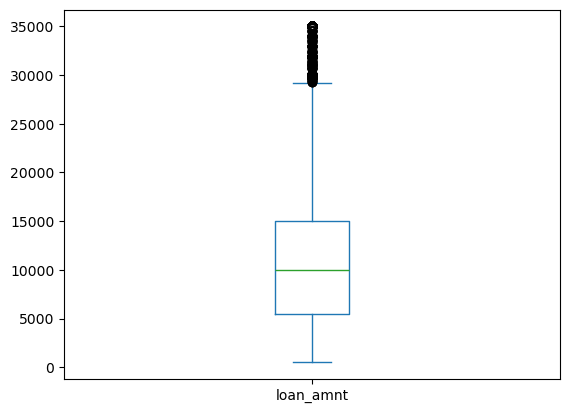

In [48]:
print(df_filtered.shape)
print(df_filtered["loan_amnt"].describe())
df_filtered['loan_amnt'].plot(kind='box')

In [49]:
df_filtered["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [50]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

# Bucketing

In [51]:
def bucket_loan_amount(column):
    if column <= 5000:
        return "0-5k" # 25% quartile
    elif (column>5000) and (column<= 10000):
        return "5k-10k"
    elif (column>10000) and (column <=15000):
        return "10k-15k"
    else:
        return "15k and above" #75% quartile

df_filtered["loan_amnt_b"] = df_filtered.apply(lambda x: bucket_loan_amount(x["loan_amnt"]),axis =1)

In [52]:
df_filtered["loan_amnt_b"].unique()

array(['0-5k', '5k-10k', '10k-15k', '15k and above'], dtype=object)

In [53]:
#Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

df_filtered['annual_inc_b'] = df_filtered.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [54]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df_filtered['int_rate_b'] = df_filtered.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

In [55]:
# Bucketing dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

df_filtered['dti_b'] = df_filtered.apply(lambda x : bucket_dti(x.dti), axis = 1)

# Plotting univariates to check for outliers

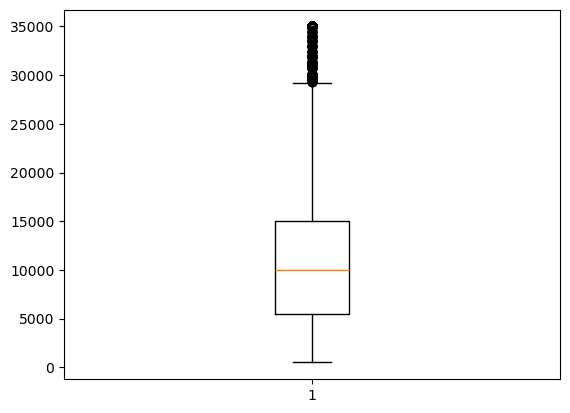

In [56]:
plt.boxplot(df_filtered['loan_amnt'])
plt.show()

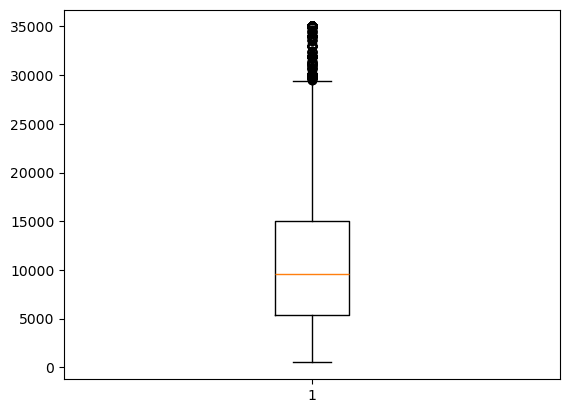

In [57]:
plt.boxplot(df_filtered['funded_amnt'])
plt.show()

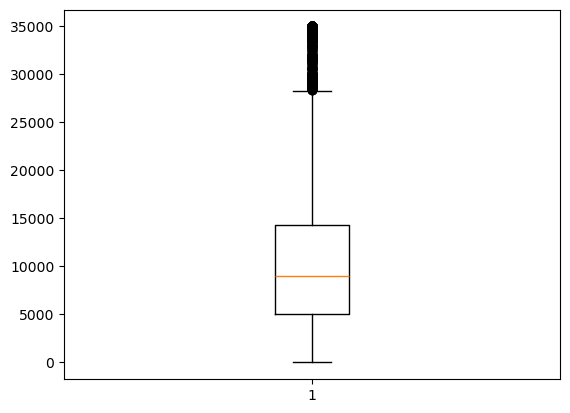

In [58]:
plt.boxplot(df_filtered['funded_amnt_inv'])
plt.show()

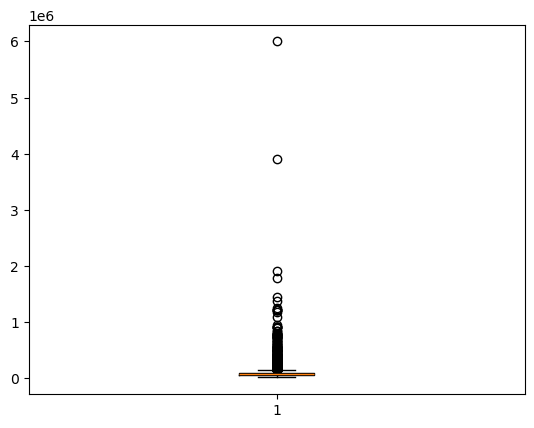

In [59]:
plt.boxplot(df_filtered['annual_inc'])
plt.show()

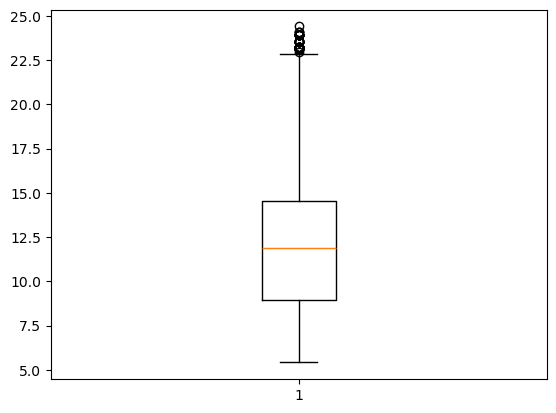

In [60]:
plt.boxplot(df_filtered['int_rate'])
plt.show()

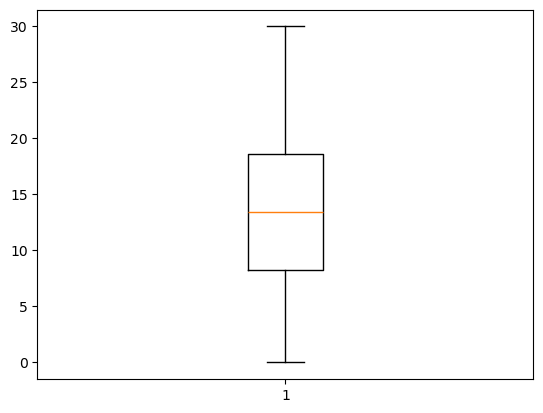

In [61]:
plt.boxplot(df_filtered['dti'])
plt.show()

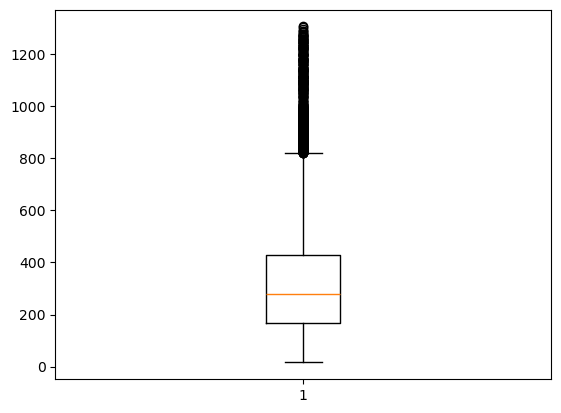

In [62]:
plt.boxplot(df_filtered['installment'])
plt.show()

From above box plots we can see there is otliers exits for columns'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc'.


# Outlier Treatment

In [63]:
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
df_filtered =remove_outliers_iqr(df_filtered, outliers_columns_set1,1.5)
df_filtered =remove_outliers_iqr(df_filtered, outliers_columns_set2,1.5)

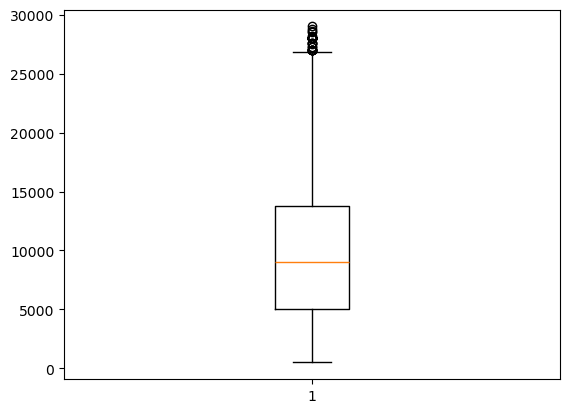

In [64]:
plt.boxplot(df_filtered['loan_amnt'])
plt.show()

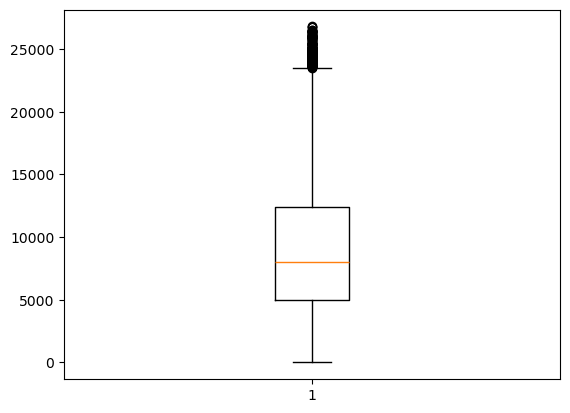

In [65]:
plt.boxplot(df_filtered['funded_amnt_inv'])
plt.show()

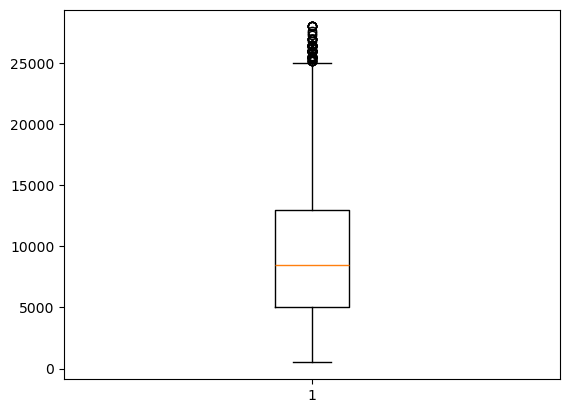

In [66]:
plt.boxplot(df_filtered['funded_amnt'])
plt.show()

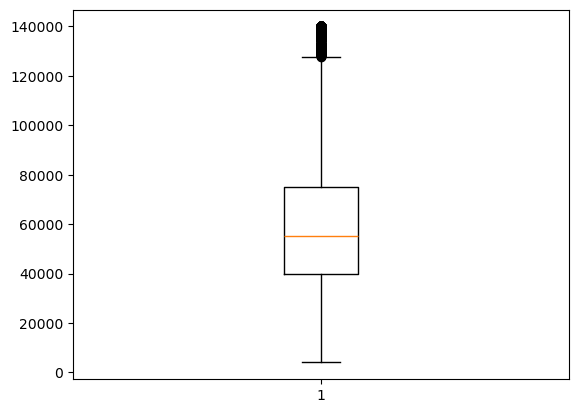

In [67]:
plt.boxplot(df_filtered['annual_inc'])
plt.show()

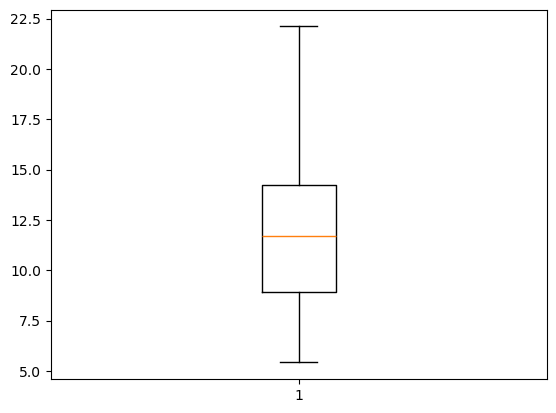

In [68]:
plt.boxplot(df_filtered['int_rate'])
plt.show()

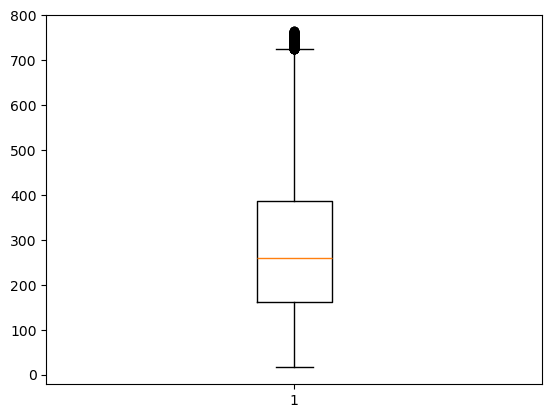

In [69]:
plt.boxplot(df_filtered['installment'])
plt.show()

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the function
def plot_digram(df, column):
    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    
    # Use seaborn (sns) for histplot and boxplot
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])  # Remove hist=True
    sns.boxplot(x=column, data=df, ax=p[1])
    
    # Set labels using column_titles (assuming it's defined elsewhere)
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    
    plt.tight_layout()
    plt.show()


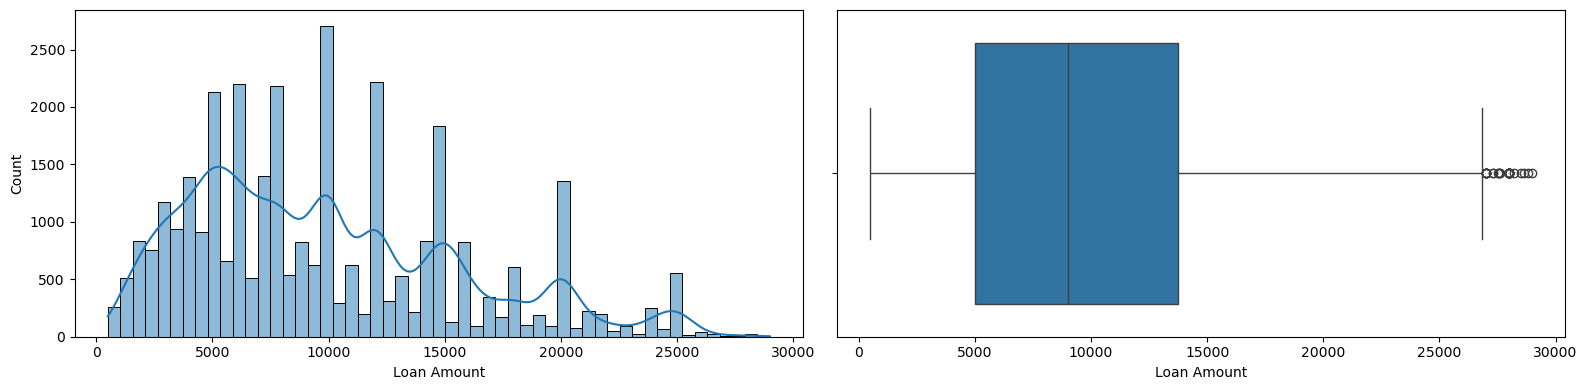

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64

In [71]:
plot_digram(df_filtered, 'loan_amnt')
#print(df_filtered["loan_amnt"].mean())
# describe the Loan Amount
df_filtered['loan_amnt'].describe()

# Observation
Most of the loan amounts lie in the range of 5 to 14k 

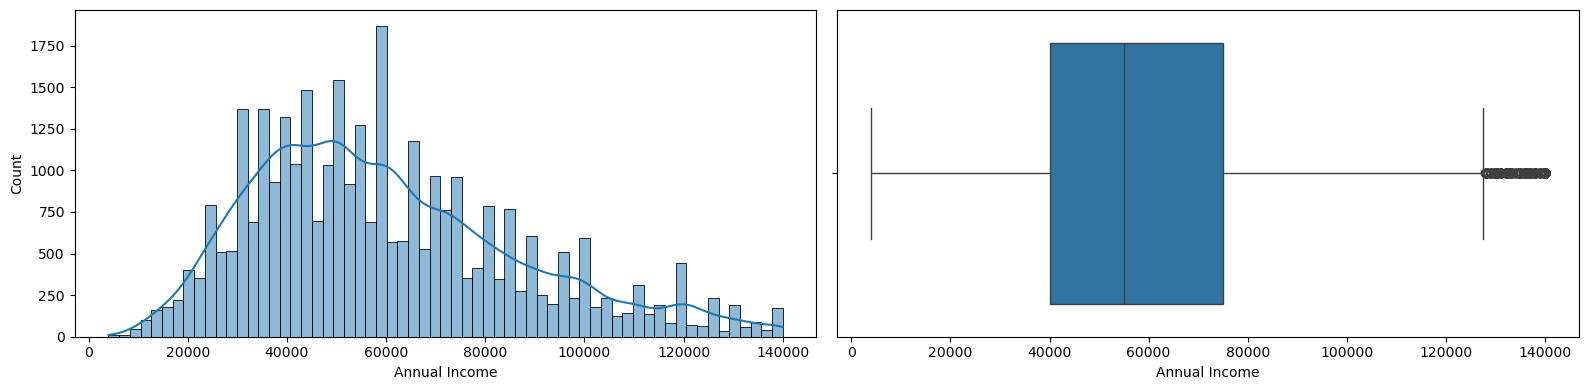

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [72]:
plot_digram(df_filtered, 'annual_inc')
#print(df_filtered["loan_amnt"].mean())
# describe the annual income details
df_filtered['annual_inc'].describe()

# Observation:

Most of the annual income lies between 4k and 7k

In [73]:
print("Average Anual Income is :", round(df_filtered['annual_inc'].mean(),0))

Average Anual Income is : 59883.0


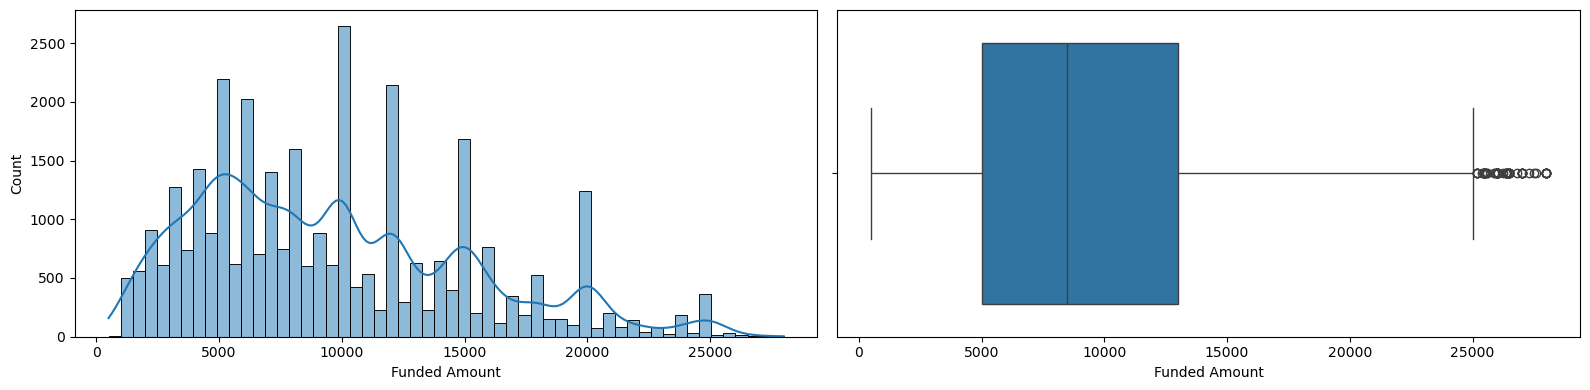

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [74]:
plot_digram(df_filtered, 'funded_amnt')
#print(df_filtered["loan_amnt"].mean())
# describe the annual income details
df_filtered['funded_amnt'].describe()

# Observation:

Majority of funded amount lies between 5k and ~14k 

In [75]:
print("Average funded amount is :", round(df_filtered['funded_amnt'].mean(),0))

Average funded amount is : 9594.0


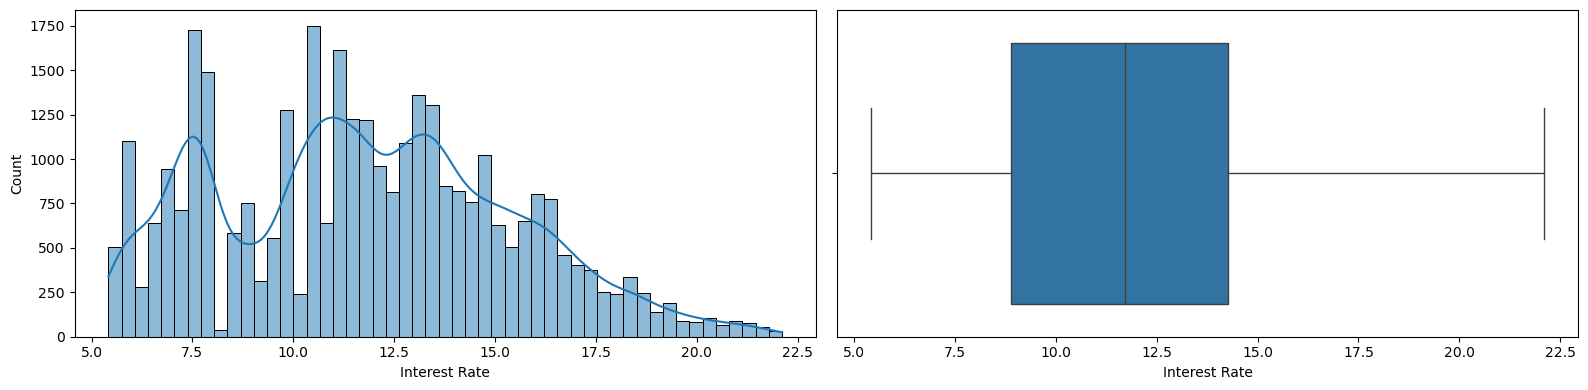

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64

In [76]:
plot_digram(df_filtered, 'int_rate')
#print(df_filtered["loan_amnt"].mean())
# describe the annual income details
df_filtered['int_rate'].describe()

# Observation:

Most of the applicant's interest rate lies between 8 to 14 %

In [77]:
print("Average interest rate is :", round(df_filtered['int_rate'].mean(),0))

Average interest rate is : 12.0


# Unordered Categorical Variable Analysis

# Home Ownership

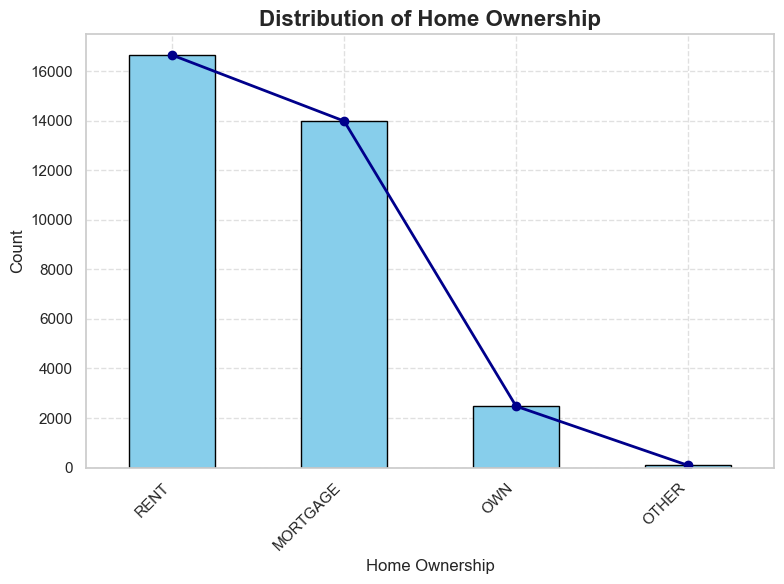

In [78]:


sns.set(style="whitegrid", palette="Blues")

# Get the value counts
value_counts = df_filtered["home_ownership"].value_counts()

# Plot the bar chart
ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))

#plotting a line through the bar heights to simulate a trendline.
bars = ax.patches
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
bar_heights = [bar.get_height() for bar in bars]
ax.plot(bar_centers, bar_heights, color='darkblue', linestyle='-', linewidth=2, marker='o')

# Optional: Customize the plot with titles and labels
ax.set_title('Distribution of Home Ownership', fontsize=16, fontweight='bold')
ax.set_xlabel('Home Ownership', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add gridlines to improve readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


# Observation:

Most of the applicants are living on rent OR have a mortgage

In [79]:
percentage_rent_or_mortgage = ((df_filtered["home_ownership"] == "RENT") | (df_filtered["home_ownership"] == "MORTGAGE")).sum() / len(df_filtered) * 100
print(f"Percentage of applicants whose purpose is 'RENT' or 'MORTGAGE': {percentage_rent_or_mortgage:.2f}%")

percentage_rent_or_mortgage = ((df_filtered["home_ownership"] == "RENT")).sum() / len(df_filtered) * 100
print(f"Percentage of applicants whose purpose is 'RENT': {percentage_rent_or_mortgage:.2f}%")

percentage_rent_or_mortgage = ((df_filtered["home_ownership"] == "MORTGAGE")).sum() / len(df_filtered) * 100
print(f"Percentage of applicants whose purpose is 'MORTAGE': {percentage_rent_or_mortgage:.2f}%")


Percentage of applicants whose purpose is 'RENT' or 'MORTGAGE': 92.27%
Percentage of applicants whose purpose is 'RENT': 50.15%
Percentage of applicants whose purpose is 'MORTAGE': 42.13%


# Purpose

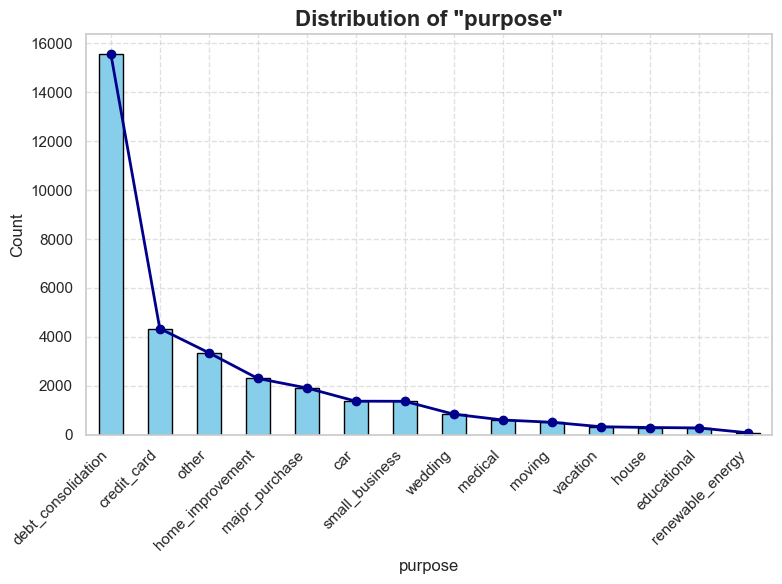

In [80]:
sns.set(style="whitegrid", palette="Blues")

# Get the value counts
value_counts = df_filtered["purpose"].value_counts()

# Plot the bar chart
ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))

#plotting a line through the bar heights to simulate a trendline.
bars = ax.patches
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
bar_heights = [bar.get_height() for bar in bars]
ax.plot(bar_centers, bar_heights, color='darkblue', linestyle='-', linewidth=2, marker='o')

# Optional: Customize the plot with titles and labels
ax.set_title('Distribution of "purpose"', fontsize=16, fontweight='bold')
ax.set_xlabel('purpose', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add gridlines to improve readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


# Observation:

Debt consolidation is the primary purpose for applications

In [81]:
percentage_debt_consolidation = ((df_filtered["purpose"]=="debt_consolidation").sum()/len(df_filtered))*100
print(f"The percentage of people applying for debt consolidation is : {percentage_debt_consolidation:.2f}%")

The percentage of people applying for debt consolidation is : 46.95%


# Address State

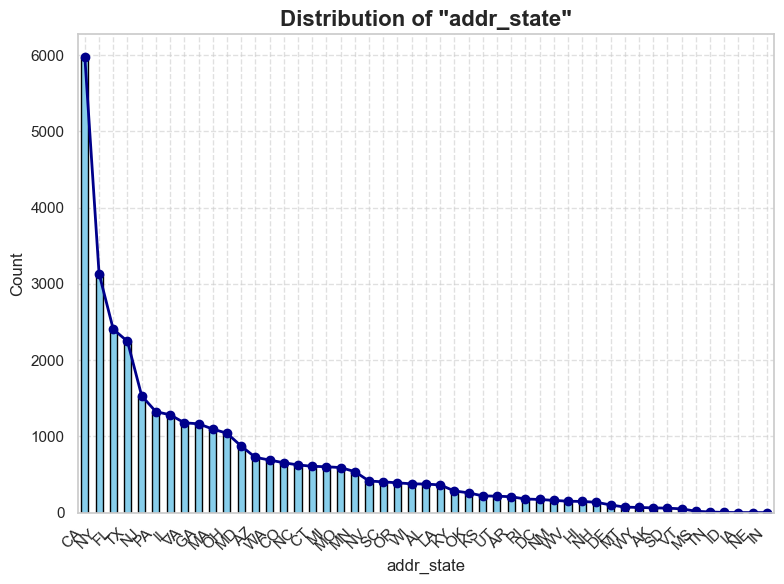

In [82]:
sns.set(style="whitegrid", palette="Blues")

# Get the value counts
value_counts = df_filtered["addr_state"].value_counts()

# Plot the bar chart
ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))

#plotting a line through the bar heights to simulate a trendline.
bars = ax.patches
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]
bar_heights = [bar.get_height() for bar in bars]
ax.plot(bar_centers, bar_heights, color='darkblue', linestyle='-', linewidth=2, marker='o')

# Optional: Customize the plot with titles and labels
ax.set_title('Distribution of "addr_state"', fontsize=16, fontweight='bold')
ax.set_xlabel('addr_state', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add gridlines to improve readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


# Observation

Majority of the applicants are from CA 

In [83]:
# Group by addr_state and calculate the percentage of 'RENT' and 'MORTGAGE' for each state
df_state_rent_mortgage = df_filtered.groupby('addr_state')['home_ownership'].value_counts(normalize=True).unstack(fill_value=0)

# Convert to percentage
df_state_rent_mortgage = df_state_rent_mortgage * 100

# Ensure columns are named correctly, and we have the percentages for 'RENT' and 'MORTGAGE'
df_state_rent_mortgage = df_state_rent_mortgage[['RENT', 'MORTGAGE']]

# Round the values to 2 decimal places and add the '%' symbol
df_state_rent_mortgage = df_state_rent_mortgage.round(2).applymap(lambda x: f"{x:.2f}%")

# Sort the DataFrame by the 'RENT' column in descending order
df_state_rent_mortgage_sorted = df_state_rent_mortgage.sort_values(by='RENT', ascending=False)

# Print the resulting sorted DataFrame
print(df_state_rent_mortgage_sorted)


home_ownership    RENT MORTGAGE
addr_state                     
NY              70.01%   21.03%
DC              68.79%   23.12%
HI              66.67%   24.49%
CA              65.57%   28.67%
OR              59.59%   36.83%
NJ              59.24%   30.76%
MA              58.58%   34.67%
WA              53.77%   42.75%
VT              50.00%   42.00%
CT              49.51%   42.27%
MD              48.11%   45.13%
VA              47.62%   45.42%
CO              47.40%   48.17%
IL              47.08%   46.38%
FL              46.34%   44.34%
WI              45.50%   50.26%
NV              45.30%   50.84%
PA              45.02%   45.02%
RI              44.69%   49.72%
AK              42.86%   50.79%
MS              42.11%   42.11%
NH              41.91%   47.79%
MN              40.33%   52.60%
MT              39.73%   47.95%
TX              39.27%   50.93%
AZ              39.03%   54.90%
UT              38.89%   59.26%
NC              38.82%   54.79%
OH              38.04%   53.89%
LA      

C:\Users\delve\AppData\Local\Temp\ipykernel_21312\1480912816.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_state_rent_mortgage = df_state_rent_mortgage.round(2).applymap(lambda x: f"{x:.2f}%")


# Ordered Categorical Variable Analysis

# Emp length

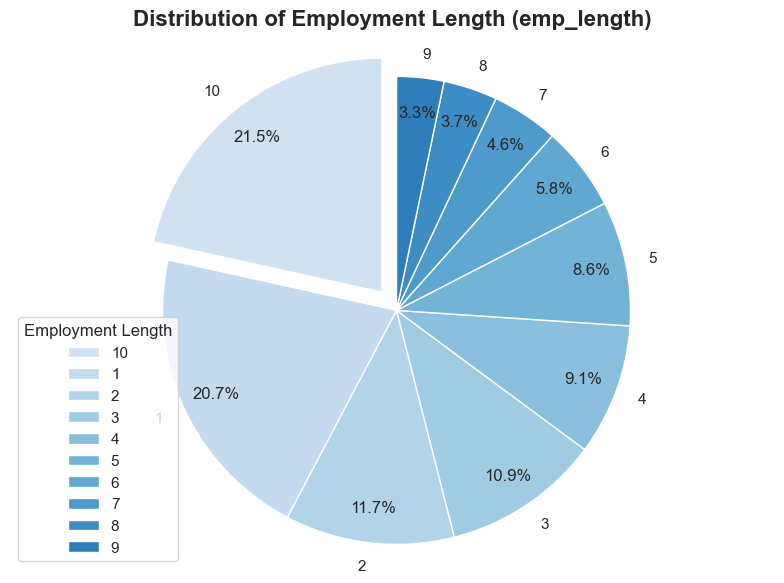

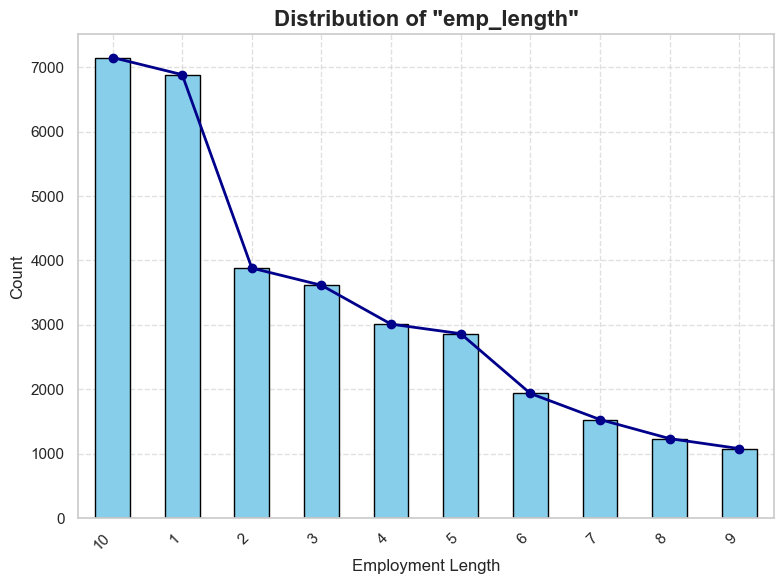

In [84]:
# Set up seaborn style
sns.set(style="whitegrid", palette="Blues")

value_counts = df_filtered["emp_length"].value_counts()

# --- 1. Plotting the 3D Pie Chart ---
# Pie chart, where the slices will be ordered and displayed as a 3D chart
fig, ax = plt.subplots(figsize=(8, 6))

# Prepare the data for the pie chart
labels = value_counts.index
sizes = value_counts.values

# Using a darker section of the Blues colormap by sampling the lower end
colors = plt.cm.Blues(np.linspace(0.2, 0.7, len(labels)))  # Darker Blues color map (range from 0.2 to 0.7)

# Define the explode list, one value for each slice
explode = [0.1] + [0] * (len(labels) - 1)  # "Explode" the first slice, others stay centered

# Plot the pie chart
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85, explode=explode)
ax.set_title("Distribution of Employment Length (emp_length)", fontsize=16, fontweight='bold')

# 3D effect (just visual, creating the illusion of 3D)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.legend(labels, title="Employment Length", loc="best")

# Display the pie chart
plt.tight_layout()
plt.show()

# --- 2. Plotting the Bar Chart with Trendline ---
# Plot the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = value_counts.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

# Plotting a line through the bar heights to simulate a trendline.
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars.patches]
bar_heights = [bar.get_height() for bar in bars.patches]
ax.plot(bar_centers, bar_heights, color='darkblue', linestyle='-', linewidth=2, marker='o')

# Optional: Customize the plot with titles and labels
ax.set_title('Distribution of "emp_length"', fontsize=16, fontweight='bold')
ax.set_xlabel('Employment Length', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=11)

# Add gridlines to improve readability
ax.grid(True, linestyle='--', alpha=0.6)

# Display the bar chart
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


# Observation:

Most of the applications are having 10+ yrs of Exp

In [85]:
# Find the top 5 most frequent employment lengths
top_5_emp_lengths = df_filtered["emp_length"].value_counts().nlargest(5)

#Calculate the total number of applications
total_applications = len(df_filtered)

#Calculate the percentage of applications for each of the top 5 employment lengths
top_5_percentage = (top_5_emp_lengths / total_applications) * 100

print("Percentage of applications for the top 5 employment lengths:")
for emp_length, percentage in top_5_percentage.items():
    print(f"Employment Length: {emp_length} years, Percentage: {percentage:.2f}%")


Percentage of applications for the top 5 employment lengths:
Employment Length: 10 years, Percentage: 21.54%
Employment Length: 1 years, Percentage: 20.74%
Employment Length: 2 years, Percentage: 11.70%
Employment Length: 3 years, Percentage: 10.89%
Employment Length: 4 years, Percentage: 9.07%


# Bivariate Analysis

# Annual income against Chargedoff

In [86]:
df_filtered["loan_status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [87]:
inc_range_vs_loan = df_filtered.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0 - 40k,1570,7326,8896,0.176484
2,50k to 60k,788,4435,5223,0.150871
1,40k - 50k,807,4593,5400,0.149444
3,60k to 70k,486,3261,3747,0.129704
4,70k to 80k,385,2749,3134,0.122846
5,80k - above,678,6113,6791,0.099838


C:\Users\delve\AppData\Local\Temp\ipykernel_21312\3887154369.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\delve\AppData\Local\Temp\ipykernel_21312\3887154369.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels([f'{x:.2f}' for x in ax1.get_yticks()], fontsize=12, color='#ecf0f1')


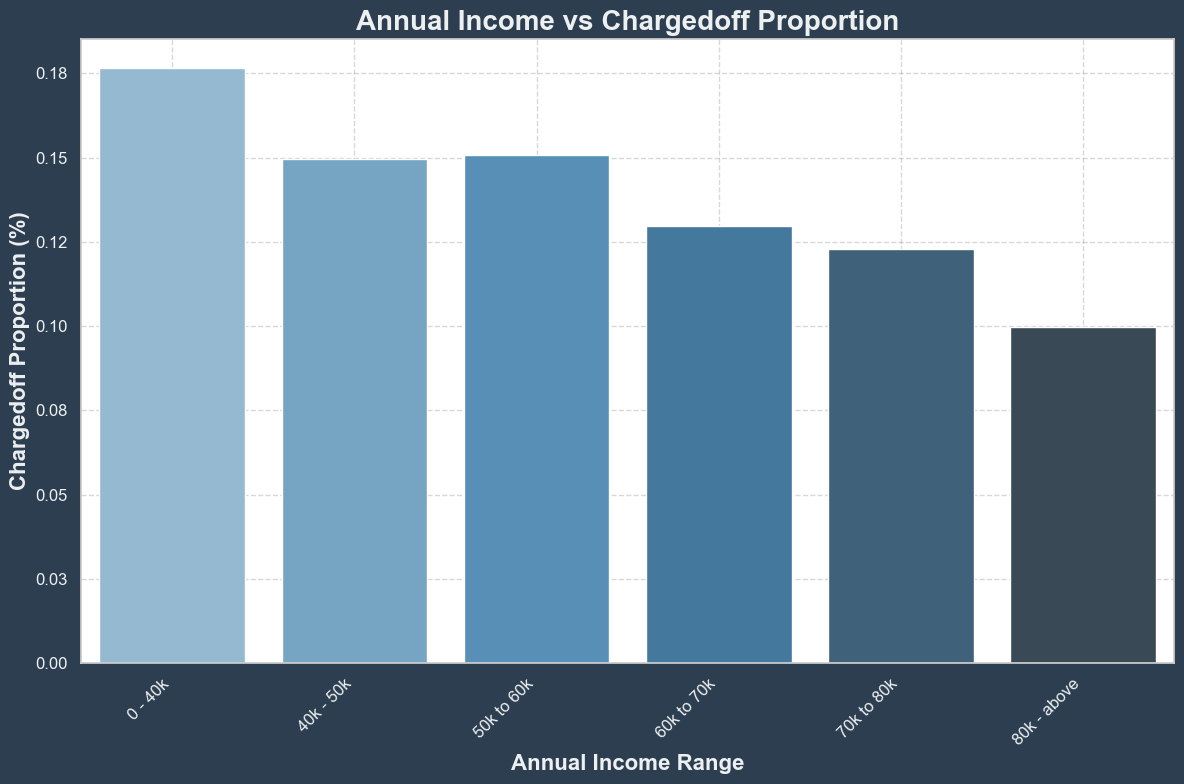

In [88]:
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='#2c3e50')  # Dark background color

# Set the title with a lighter color for better contrast
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=20, color='#ecf0f1', fontweight='bold')

# Create the barplot with 'Blues_d' palette
sns.barplot(
    x='annual_inc_b',  # X-axis: Income ranges
    y='Chargedoff_Proportion',  # Y-axis: Proportion of Charged Off loans
    data=inc_range_vs_loan,  # Data
    palette='Blues_d',  # Dark blue palette
    ax=ax1  # Set the axis object
)

# Set y-axis label with larger font and lighter color for readability
ax1.set_ylabel('Chargedoff Proportion (%)', fontsize=16, color='#ecf0f1', fontweight='bold')

# Set x-axis label with larger font and lighter color for readability
ax1.set_xlabel('Annual Income Range', fontsize=16, color='#ecf0f1', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, color='#ecf0f1')

# Rotate y-axis labels for better readability
ax1.set_yticklabels([f'{x:.2f}' for x in ax1.get_yticks()], fontsize=12, color='#ecf0f1')

# Add a grid with lighter lines to improve readability
ax1.grid(True, linestyle='--', color='gray', alpha=0.3)

# Adjust layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


In [89]:
# Find the income group with the highest Chargedoff Proportion
highest_chance = inc_range_vs_loan.loc[inc_range_vs_loan['Chargedoff_Proportion'].idxmax()]

# Find the income group with the lowest Chargedoff Proportion
lowest_chance = inc_range_vs_loan.loc[inc_range_vs_loan['Chargedoff_Proportion'].idxmin()]

# Identify the trend (is it increasing or decreasing with income?)
if inc_range_vs_loan['Chargedoff_Proportion'].iloc[-1] > inc_range_vs_loan['Chargedoff_Proportion'].iloc[0]:
    trend = "The proportion of charged-off loans increases as income increases."
else:
    trend = "The proportion of charged-off loans decreases as income increases."

# Print the results
print("Highest chances of being charged off:")
print(f"Income Range: {highest_chance['annual_inc_b']}, Proportion: {highest_chance['Chargedoff_Proportion']:.2f}")

print("\nLowest chances of being charged off:")
print(f"Income Range: {lowest_chance['annual_inc_b']}, Proportion: {lowest_chance['Chargedoff_Proportion']:.2f}")

print("\nTrend analysis:")
print(trend)


Highest chances of being charged off:
Income Range: 0 - 40k, Proportion: 0.18

Lowest chances of being charged off:
Income Range: 80k - above, Proportion: 0.10

Trend analysis:
The proportion of charged-off loans decreases as income increases.


# Interest vs chargedoff

In [90]:
interest_vs_loan = df_filtered.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1670,4751,6421,0.260084
0,High,985,4851,5836,0.168780
2,Moderate,961,5638,6599,0.145628
1,Low,579,4983,5562,0.104099
4,Very Low,519,8254,8773,0.059159


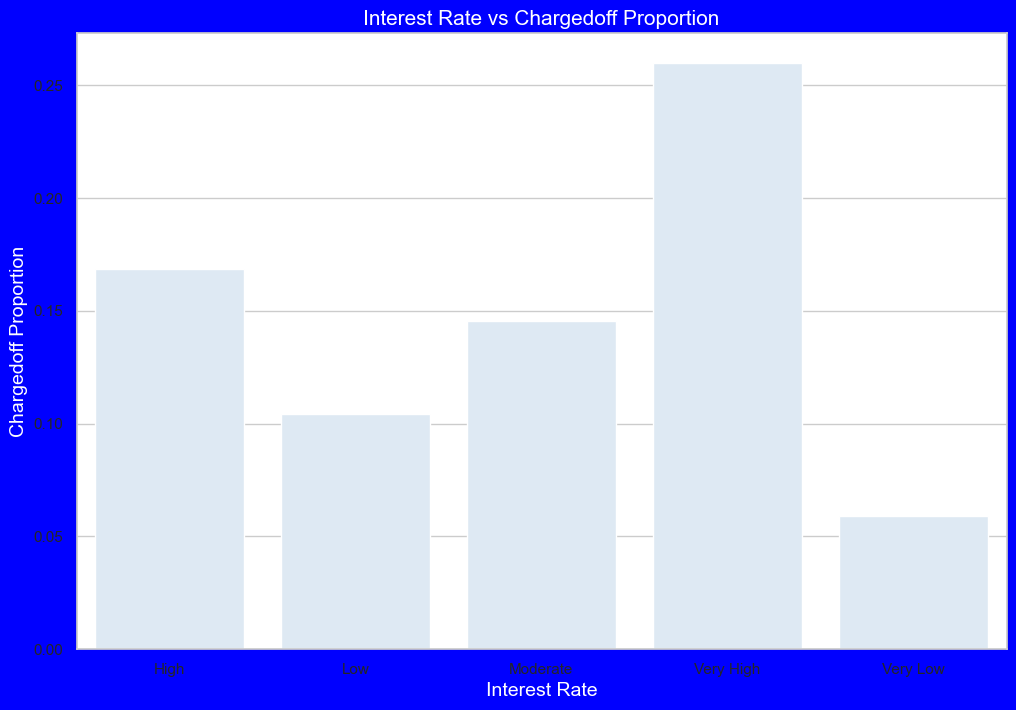

In [91]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Interest Rate vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

# Observations:

Very high charged off rates cause the highest chargedoff proportions

Interest rates which are 10% or lesser have the least chances of charged off

Interest rates start at 5%

Interest rates beyond 15% are at high risk of facing chargedoff 

# Homeownership vs chargeoff 

In [92]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = df_filtered.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
1,OTHER,16,73,89,0.179775
3,RENT,2488,14156,16644,0.149483
2,OWN,355,2121,2476,0.143376
0,MORTGAGE,1855,12127,13982,0.132671


C:\Users\delve\AppData\Local\Temp\ipykernel_21312\1495862853.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan,
C:\Users\delve\AppData\Local\Temp\ipykernel_21312\1495862853.py:13: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax1 = sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan,


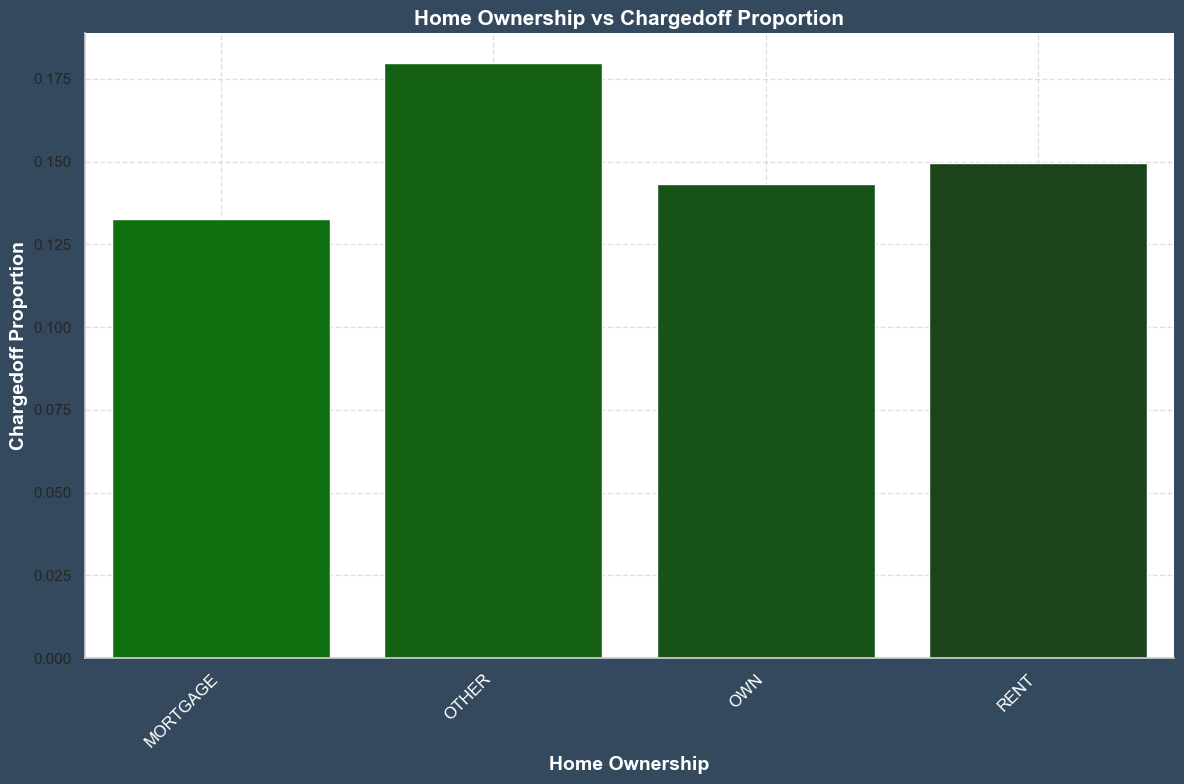

In [93]:


# Set Seaborn style for better appearance
sns.set(style="whitegrid")

# Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='#34495e')  # Darker background color

# Set the title and axis labels with proper styling
ax1.set_title('Home Ownership vs Chargedoff Proportion', fontsize=15, color='white', fontweight='bold')
ax1.set_xlabel('Home Ownership', fontsize=14, color='white', fontweight='bold')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='white', fontweight='bold')

# Use a darker green palette for the bars
ax1 = sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan, 
                  palette=sns.dark_palette("green", reverse=True))  # Dark green palette

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, color='white')

# Add gridlines to the plot for better readability
ax1.grid(True, linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


# Observation:

Those who are not having their own homes are having high chances of loan defaults.

Those who have a mortgage have the lowest chances of defaulting


# Purpose of loan vs Chargedoff_Proportion

In [94]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = df_filtered.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,366,1003,1369,0.267348
10,renewable_energy,16,67,83,0.192771
5,house,49,249,298,0.164430
3,educational,46,235,281,0.163701
9,other,531,2823,3354,0.158318
7,medical,95,510,605,0.157025
8,moving,79,433,512,0.154297
2,debt_consolidation,2329,13253,15582,0.149467
12,vacation,49,281,330,0.148485
4,home_improvement,277,2026,2303,0.120278


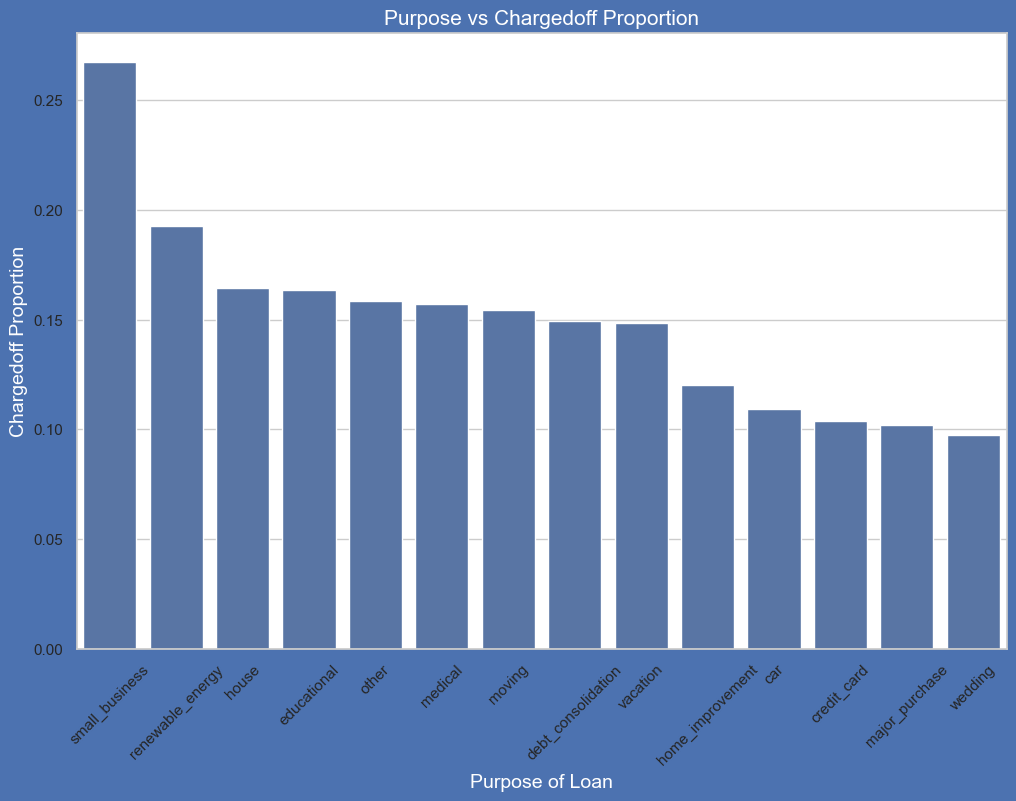

In [95]:
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')

# Set the title and axis labels
ax1.set_title('Purpose vs Chargedoff Proportion', fontsize=15, color='w')
ax1.set_xlabel('Purpose of Loan', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')

# Sort the values in descending order by 'Chargedoff_Proportion' and apply it to 'order'
order = purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)['purpose']

# Plot with sorted bars
ax1 = sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan, order=order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Observation:

Small businesses and renewable energy take up the highest proportion of charged off

Wedding and major_purchase has the lowest possibility of becoming charged off

DTI vs Chargeoff 

In [96]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -

dti_vs_loan = df_filtered.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,Very High,1044,5387,6431,0.162339
0,High,948,5111,6059,0.156461
2,Moderate,985,5785,6770,0.145495
1,Low,789,5339,6128,0.128753
4,Very Low,948,6855,7803,0.121492


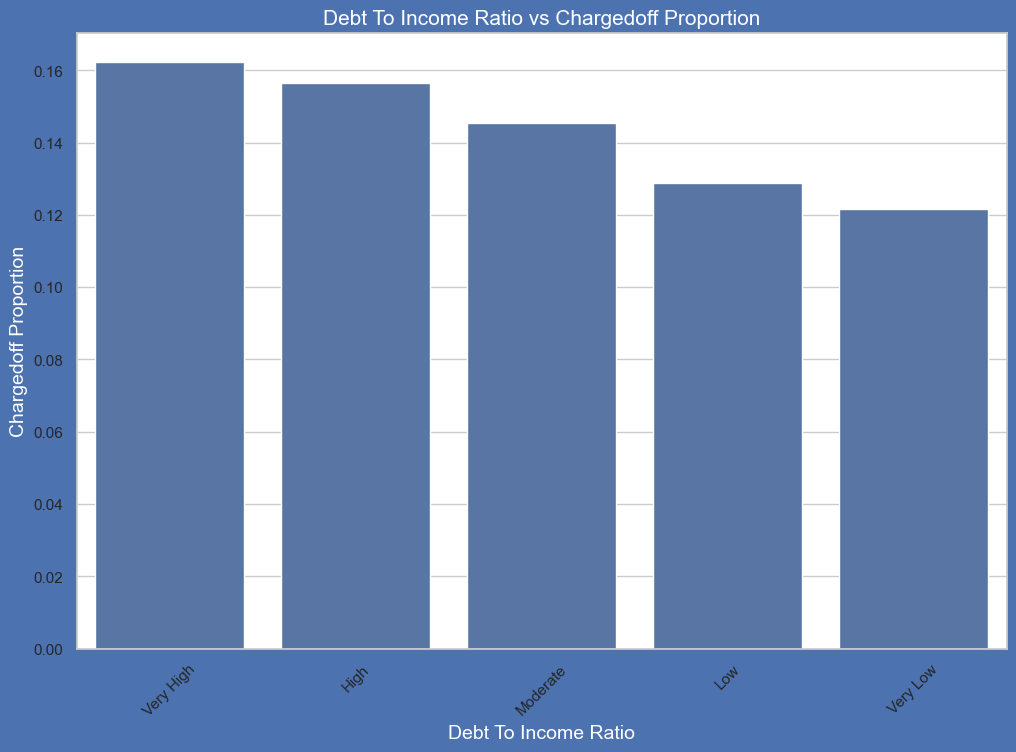

In [97]:
# Sort the DataFrame by 'Chargedoff_Proportion' in descending order and get the 'dti_b' values for ordering
order = dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)['dti_b']

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion', fontsize=15, color='w')

# Plot the barplot with the sorted order
ax1 = sns.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan, order=order)

# Set axis labels
ax1.set_xlabel('Debt To Income Ratio', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


# Observation

"High" and "Very high" debt to income ratio causes the max amount of chargedoffs

"Very low" DTI causes the least amount of chargedoff

In [98]:
df_filtered["pub_rec_bankruptcies"].value_counts()

pub_rec_bankruptcies
0.0    31741
1.0     1445
2.0        5
Name: count, dtype: int64

# Bankruptcies Record VS Chargedoff_Proportion

In [99]:
# #Bivariate Analysis on Bankruptcies Record against Chargedoff_Proportion -

pub_rec_bankruptcies_vs_loan = df_filtered.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,308,1137,1445,0.213149
0,0.0,4404,27337,31741,0.138748


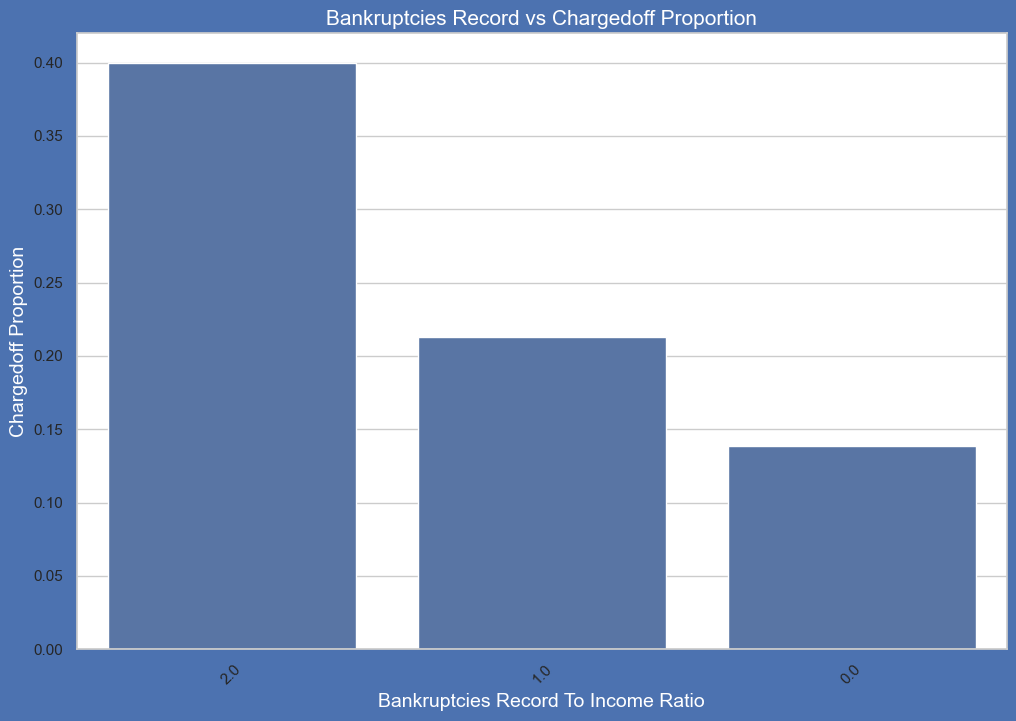

In [100]:
# Sort the DataFrame by 'Chargedoff_Proportion' in descending order and get the 'pub_rec_bankruptcies' values for ordering
order = pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)['pub_rec_bankruptcies']

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='b')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion', fontsize=15, color='w')

# Plot the barplot with the sorted order
ax1 = sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan, order=order)

# Set axis labels
ax1.set_xlabel('Bankruptcies Record To Income Ratio', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Observations:

Bankruptcies Record with 2 is having high impact on loan defaults

Bankruptcies Record with 0 is low impact on loan defaults

Lower the Bankruptcies lower the risk.

In [101]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -

issue_year_vs_loan = df_filtered.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_year,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,2007,2,5,7,0.285714
4,2011,2705,14788,17493,0.154633
1,2008,158,880,1038,0.152216
3,2010,1312,9012,10324,0.127083
2,2009,537,3792,4329,0.124047


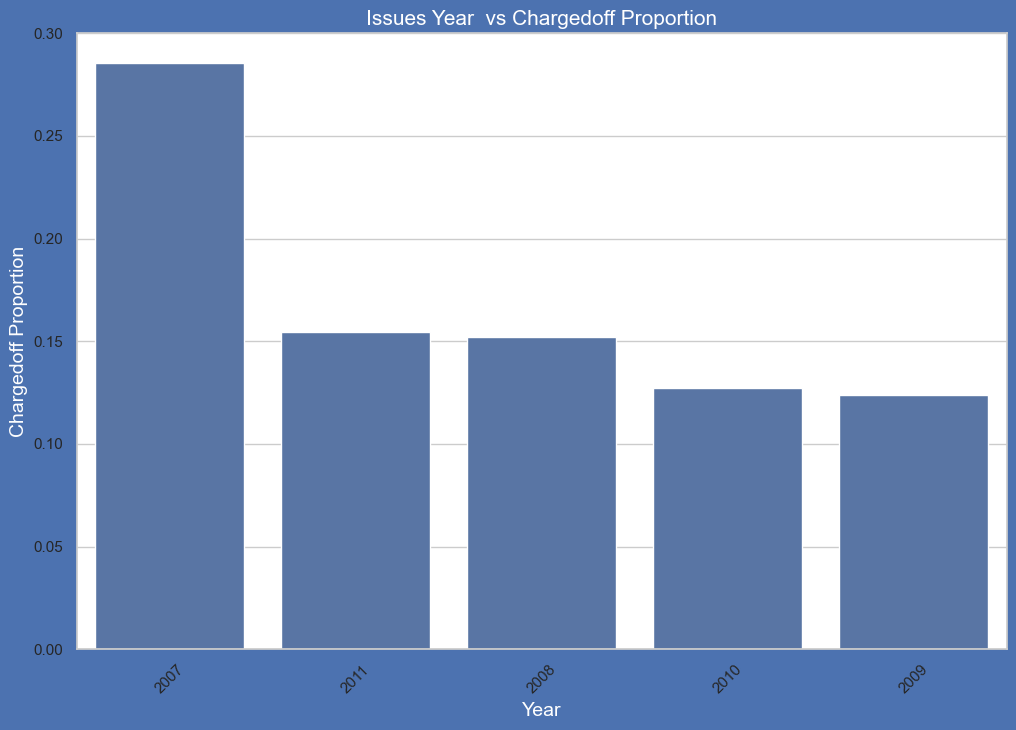

In [102]:
order = issue_year_vs_loan.sort_values("Chargedoff_Proportion",ascending= False)["issue_year"]

fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan, order = order)
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observation:

Issue year 2007 has significantly higher chances of defaulting than the rest of the years

Issue year 2009 has the least chances of a default

In [103]:
#Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -

issue_month_vs_loan = df_filtered.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,issue_month,Charged Off,Fully Paid,Total,Chargedoff_Proportion
8,9,477,2531,3008,0.158577
11,12,567,3034,3601,0.157456
4,5,401,2188,2589,0.154886
9,10,462,2693,3155,0.146434
5,6,410,2390,2800,0.146429
10,11,494,2976,3470,0.142363
6,7,415,2534,2949,0.140726
7,8,405,2562,2967,0.136502
0,1,260,1724,1984,0.131048
3,4,317,2176,2493,0.127156


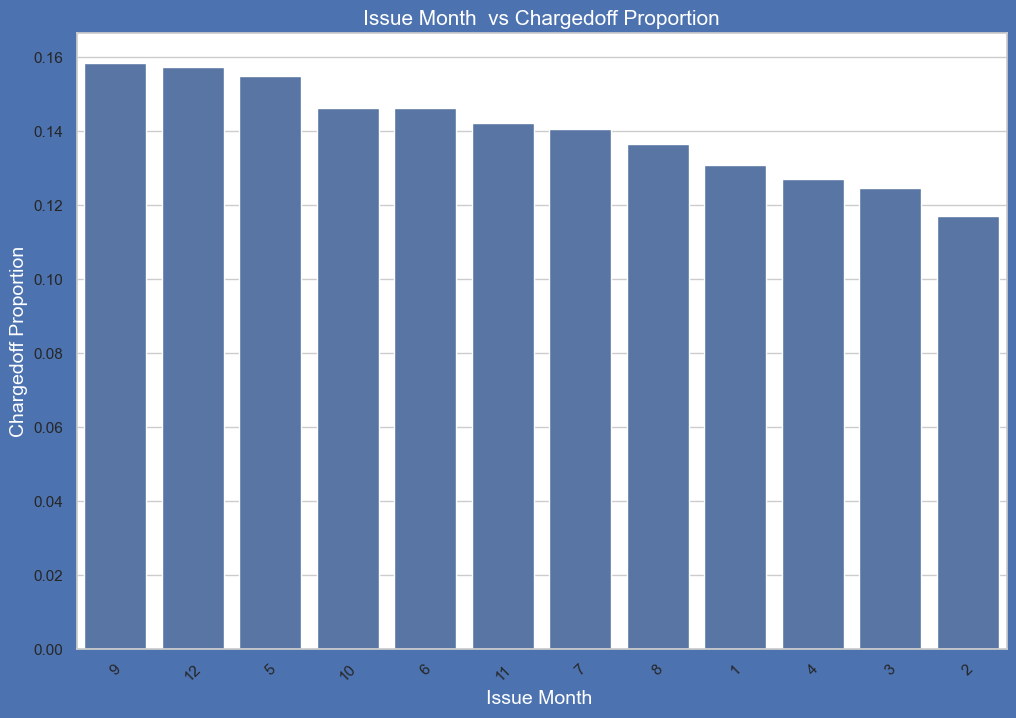

In [104]:
# graph
order = issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)["issue_month"]
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan, order = order)
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations:

Months 9, 12 and 5 have the highest chances of being a chargedoff

Month 2 has the lowest chance of being a chargedoff

# Address state  vs Chargedoff_Proportion

In [105]:
#Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = df_filtered.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_Proportion
40,TN,2.0,7.0,9.0,0.222222
31,NV,87.0,328.0,415.0,0.209639
11,HI,28.0,119.0,147.0,0.190476
0,AK,12.0,51.0,63.0,0.190476
39,SD,11.0,48.0,59.0,0.186441
30,NM,28.0,133.0,161.0,0.173913
9,FL,414.0,1990.0,2404.0,0.172213
23,MO,99.0,492.0,591.0,0.167513
35,OR,63.0,328.0,391.0,0.161125
10,GA,184.0,981.0,1165.0,0.157940


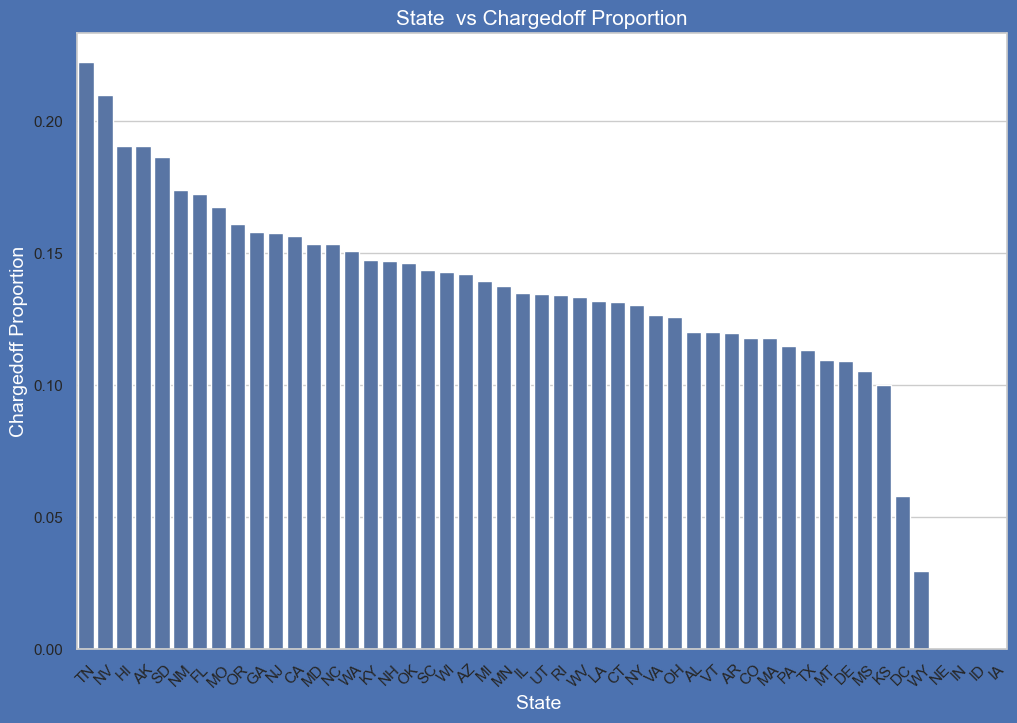

In [106]:
# graph

order = addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)["addr_state"]
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan, order =order)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observation:

States TN AND NV have the highest chargedoff rates

IA, ID, NE, IN, WY have the least chargedoff rates

# Grade vs Chargedoff_Proportion

In [107]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -


grade_vs_loan = df_filtered.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,Chargedoff_Proportion
6,G,55,104,159,0.345912
5,F,220,480,700,0.314286
4,E,557,1518,2075,0.268434
3,D,941,3329,4270,0.220375
2,C,1177,5702,6879,0.171100
1,B,1225,8857,10082,0.121504
0,A,539,8487,9026,0.059716


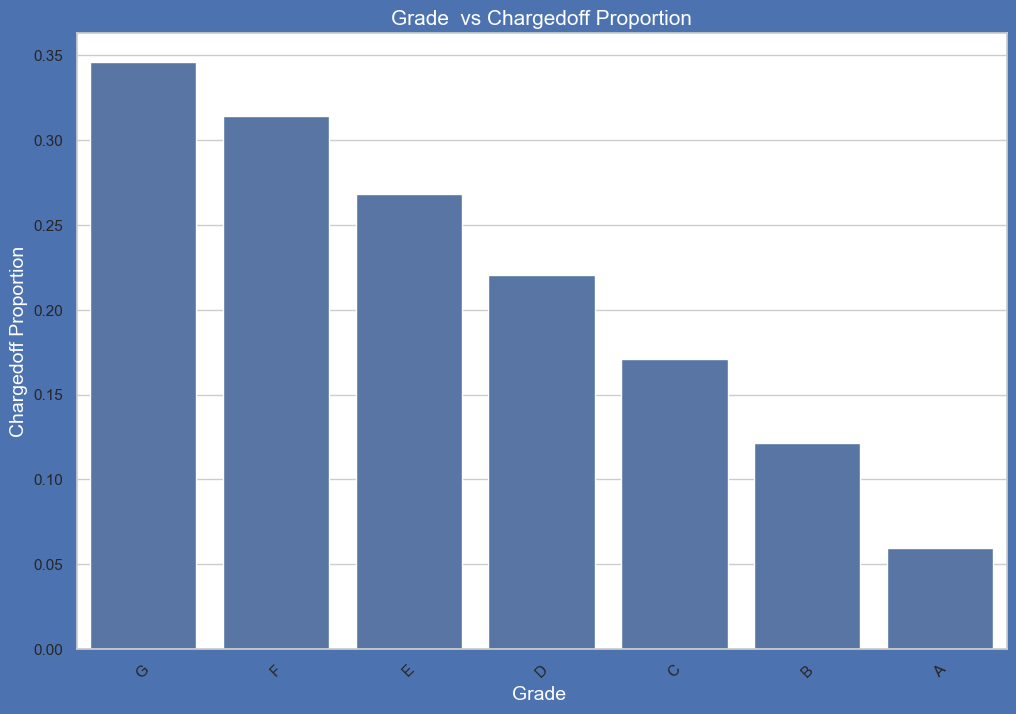

In [108]:
order = grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)["grade"]
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='b')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan, order = order)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

# Observations:

G and F loan grades have the highest charged off rates

A and B loan grades have the lowesr charged off rates

# Encoding 

In [109]:
df_filtered.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'zip_code', 'addr_state', 'dti',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'loan_amnt_b',
       'annual_inc_b', 'int_rate_b', 'dti_b'],
      dtype='object')

In [110]:
df_filtered.select_dtypes(include=['object']).columns


Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'url', 'purpose', 'zip_code',
       'addr_state', 'loan_amnt_b', 'annual_inc_b', 'int_rate_b', 'dti_b'],
      dtype='object')

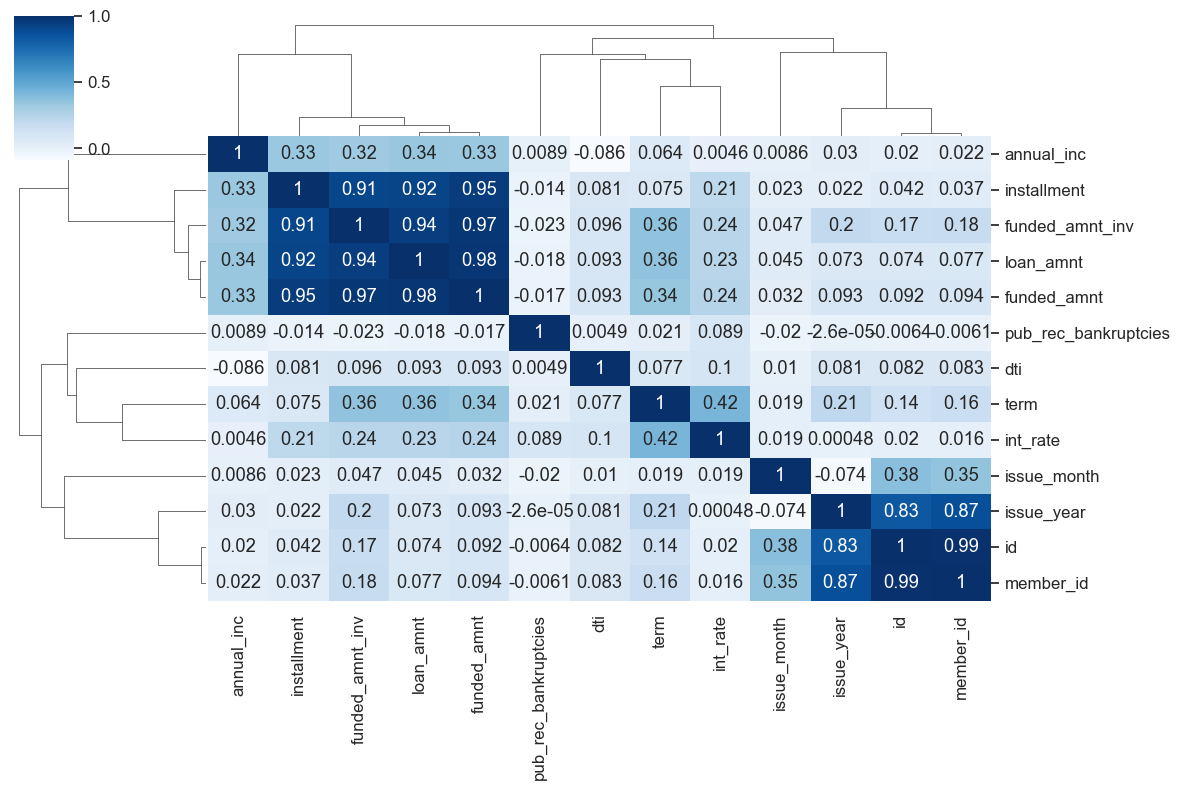

In [111]:
# Select only numeric columns for correlation
corr_loan = df_filtered.select_dtypes(include=['number'])
corr = corr_loan.corr()
sns.set(font_scale=1.1)
sns.clustermap(corr, annot=True, figsize=(12, 8), cmap="Blues")
plt.show()

# Correlation Analysis

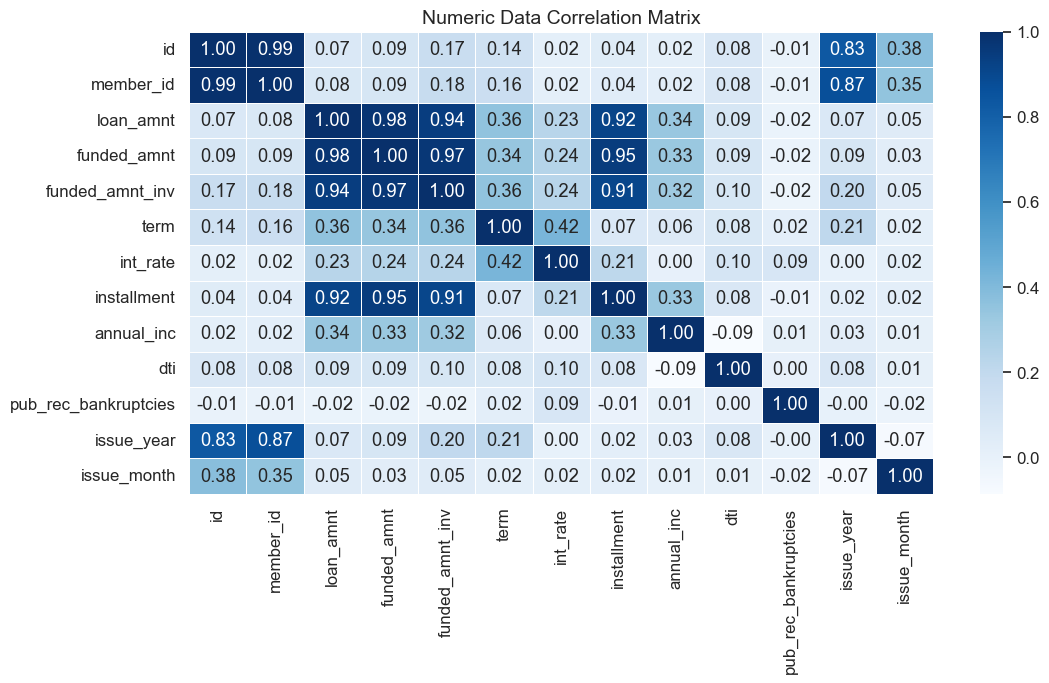

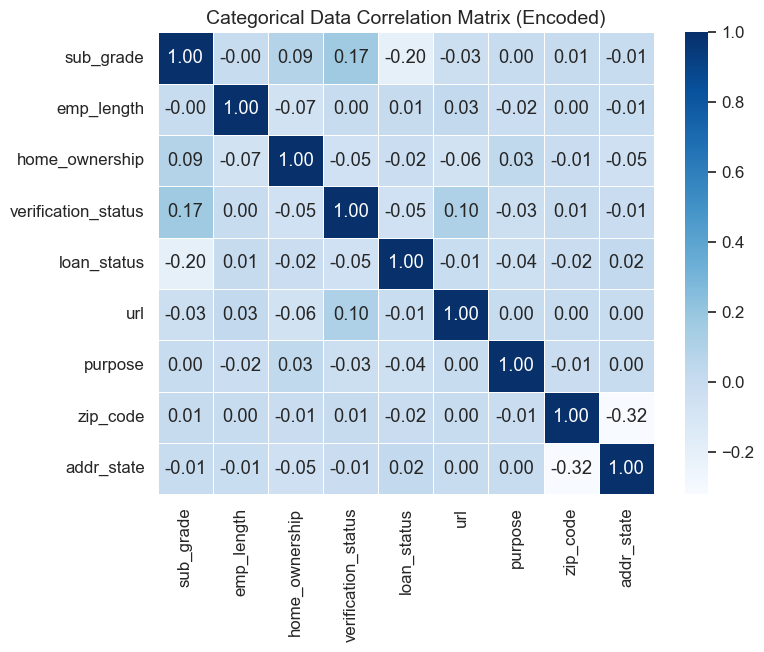

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming df_filtered is your DataFrame

# 1. Remove unwanted columns
#df_filtered = df_filtered.drop(columns=['installment', 'id', 'issue_year', 'issue_month'])

# 2. Separate Numeric Columns (after dropping the unwanted columns)
numeric_cols = df_filtered.select_dtypes(include=['number']).columns
numeric_data = df_filtered[numeric_cols]

# 3. Calculate the correlation matrix for numeric columns
numeric_corr = numeric_data.corr()

# 4. Handle Categorical Columns (after dropping the unwanted columns)
categorical_cols = ['sub_grade', 'emp_length', 'home_ownership', 'verification_status', 
                    'loan_status', 'url', 'purpose', 'zip_code', 'addr_state']

# Apply Label Encoding to Categorical Columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_filtered[col] = label_encoder.fit_transform(df_filtered[col])

# 5. Select the newly encoded categorical columns and calculate the correlation matrix
categorical_data = df_filtered[categorical_cols]
categorical_corr = categorical_data.corr()

# 6. Plot the heatmaps for both correlation matrices

# Plot Numeric Correlation Matrix (smaller chart)
plt.figure(figsize=(12, 6))  # Adjusted size for smaller chart
sns.heatmap(numeric_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Numeric Data Correlation Matrix', fontsize=14)
plt.show()

# Plot Categorical Correlation Matrix (smaller chart)
plt.figure(figsize=(8, 6))  # Adjusted size for smaller chart
sns.heatmap(categorical_corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Categorical Data Correlation Matrix (Encoded)', fontsize=14)
plt.show()


# Observation:

Negative Correlation:

1.loan_amnt has negative correlation with pub_rec_bankrupticies

2.annual income has a negative correlation with dti

Strong Correlation:

1.term has a strong correlation with loan amount

2.term has a strong correlation with interest rate

3.annual income has a strong correlation with loan_amount

# DIVING INTO ML

In [113]:
# Importing necessary libs:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [114]:
df_filtered.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                        int32
emp_length                       int32
home_ownership                   int32
annual_inc                     float64
verification_status              int32
issue_d                 datetime64[ns]
loan_status                      int32
url                              int32
purpose                          int32
zip_code                         int32
addr_state                       int32
dti                            float64
pub_rec_bankruptcies           float64
issue_year                       int32
issue_month                      int32
loan_amnt_b                     object
annual_inc_b             

In [115]:
df_for_ml = df_filtered.copy()

In [116]:
df_for_ml = df_for_ml.drop(columns=['issue_d'])


# One- hot Encoding :

In [143]:
# Calculate the proportion of charged-off loans across the entire dataset
charged_off_count = df_for_ml[df_for_ml['loan_status'] == 0].shape[0]  # charged off loans (loan_status == 0)
total_count = df_for_ml.shape[0]  # total number of loans

# Calculate the charged off proportion
charged_off_proportion = charged_off_count / total_count

# Add a new column 'Chargedoff_Proportion' to df_for_ml with the same proportion value for all rows
df_for_ml['Chargedoff_Proportion'] = charged_off_proportion

# Print the new column to verify
print(f"Proportion of charged-off loans: {charged_off_proportion:.4f}")


Proportion of charged-off loans: 0.1420


In [141]:
print(df_for_ml["loan_status"].value_counts())

loan_status
1    28477
0     4714
Name: count, dtype: int64


In [142]:
# Perform one-hot encoding on categorical columns for ML dataframe
df_for_ml = pd.get_dummies(df_for_ml, drop_first=True)


# Test train split : 


In [144]:
from sklearn.model_selection import train_test_split

# Split into X (features) and y (target)
X_ml = df_for_ml.drop(columns=['loan_status', 'Chargedoff_Proportion'])
y_ml = df_for_ml['loan_status']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.2, random_state=42)


# Model Selection and training : 

We will with Random Forest or XGBoost, as these models often strike a good balance between performance, ease of use, and interpretability. They handle nonlinear relationships, can capture feature interactions, and generally work well out-of-the-box with minimal tuning.

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8654917909323694
Confusion Matrix:
 [[  34  850]
 [  43 5712]]
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.04      0.07       884
           1       0.87      0.99      0.93      5755

    accuracy                           0.87      6639
   macro avg       0.66      0.52      0.50      6639
weighted avg       0.81      0.87      0.81      6639



# Observations:

1. High number of True Positives (TP) for Class 1:
In our confusion matrix, we have 5728 True Positives for class 1 (the positive class). This means the model is correctly predicting class 1 most of the time. This is a good thing, but in the context of imbalance, it can also be a sign that the model is too biased toward class 1.

2. Low number of True Negatives (TN) for Class 0:
For class 0 (the negative class), we have only 14 True Negatives. This means the model is correctly predicting class 0 only 14 times. This number is extremely low, especially when compared to the 5728 True Positives for class 1, suggesting that the model is not effectively recognizing class 0 instances.

3. High number of False Positives (FP) for Class 0:
The model is predicting class 1 when it should be predicting class 0 870 times (False Positives). A high False Positive count indicates that the model is incorrectly classifying a lot of the class 0 instances as class 1. This is a clear sign that the model is leaning heavily toward predicting the majority class (class 1) and failing to identify class 0 accurately.

4. Very low Recall for Class 0:
From the classification report, the recall for class 0 is only 0.02 (2%). Recall measures how many of the actual class 0 instances were correctly identified by the model. A recall of 0.02 means that the model is missing nearly all actual class 0 instances, confirming that the model has a very poor ability to detect class 0. In contrast, the recall for class 1 is 1.00, meaning the model is identifying every class 1 instance correctly.

# Steps to address the problem:

1. Resample the Data
2. Adjust Class Weights
3. Hyperparameter Tuning

In [146]:
# Checking class distribution before resampling

print("Class distribution in y_train before resampling:")
print(y_train.value_counts())

Class distribution in y_train before resampling:
loan_status
1    22722
0     3830
Name: count, dtype: int64


We'll apply SMOTE (Synthetic Minority Over-sampling Technique) to the training data. This will help balance the classes by generating synthetic samples for the minority class (class 0).

1. Resampling

In [147]:
import sklearn
import imblearn
import threadpoolctl

print(sklearn.__version__)
print(imblearn.__version__)
print(threadpoolctl.__version__)


1.5.2
0.12.4
3.5.0


In [148]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution in y_train after resampling:")
print(y_train_resampled.value_counts())


Class distribution in y_train after resampling:
loan_status
1    22722
0    22722
Name: count, dtype: int64


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# List of models to try
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42)
}

# Initialize a dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")

    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Predict probabilities for ROC-AUC score
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Collect evaluation metrics
    accuracy = model.score(X_test, y_test)  # Accuracy score
    roc_auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    class_report = classification_report(y_test, y_pred, output_dict=True)
    
    results[model_name] = {
        "Accuracy": accuracy,
        "ROC-AUC": roc_auc,
        "Precision (Class 1)": class_report['1']['precision'],
        "Recall (Class 1)": class_report['1']['recall'],
        "F1-Score (Class 1)": class_report['1']['f1-score']
    }
    
    # Display confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)

# Convert results to DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

Training and evaluating Logistic Regression...


c:\Users\delve\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix for Logistic Regression:
[[ 536  348]
 [2567 3188]]
--------------------------------------------------
Training and evaluating Random Forest...
Confusion Matrix for Random Forest:
[[  73  811]
 [ 118 5637]]
--------------------------------------------------
Training and evaluating Support Vector Machine...
Confusion Matrix for Support Vector Machine:
[[ 513  371]
 [2591 3164]]
--------------------------------------------------
Training and evaluating k-Nearest Neighbors...
Confusion Matrix for k-Nearest Neighbors:
[[ 339  545]
 [2024 3731]]
--------------------------------------------------
Training and evaluating Decision Tree...
Confusion Matrix for Decision Tree:
[[ 203  681]
 [ 971 4784]]
--------------------------------------------------
Training and evaluating XGBoost...
Confusion Matrix for XGBoost:
[[  61  823]
 [ 115 5640]]
--------------------------------------------------
                        Accuracy   ROC-AUC  Precision (Class 1)  \
Logistic Regression 

# Analysis:

1. Accuracy:
Random Forest (0.860) and XGBoost (0.859) have the highest accuracy, both performing much better than other models. They also achieve almost the same level of accuracy.

Logistic Regression (0.561) and Support Vector Machine (0.554) have much lower accuracy, indicating that they are not performing as well on this task.

2. ROC-AUC:

XGBoost (0.678) and Random Forest (0.667) also lead in terms of ROC-AUC, which measures the model’s ability to distinguish between the two classes.

Support Vector Machine does not report ROC-AUC, likely due to the inability of the model to predict probabilities, which is needed for AUC calculation.

3. Precision (Class 1):
Logistic Regression (0.902) has the highest precision for predicting the minority class (charged off loans), meaning it makes fewer false positive errors compared to the others.

Random Forest, Decision Tree, and XGBoost have slightly lower precision, but they are still performing well in terms of predicting minority class instances.

4. Recall (Class 1):
Random Forest (0.979) and XGBoost (0.980) show the highest recall for predicting the minority class, meaning they are very good at identifying all of the minority class (charged off loans) instances.

Logistic Regression (0.554) and Support Vector Machine (0.550) have much lower recall, which means they miss a large number of minority class instances.

5. F1-Score (Class 1):
Random Forest (0.924) and XGBoost (0.923) both perform the best in terms of F1-score, which is a balanced measure of precision and recall.

Logistic Regression (0.686) and Support Vector Machine (0.681) have much lower F1-scores, indicating that they are not as balanced in terms of both precision and recall.

# Conclusion:

Random Forest and XGBoost are clearly the best models overall in terms of accuracy, recall, precision, ROC-AUC, and F1-score. They strike a good balance between correctly identifying the minority class (charged off loans) and maintaining a high level of precision.

Logistic Regression and Support Vector Machine are not as effective in this case, with Logistic Regression being particularly poor in terms of recall (it misses a lot of charged-off loans).

If our main goal is to maximize recall (finding as many charged-off loans as possible), Random Forest or XGBoost would be the best choices.

If we want to make sure we have fewer false positives while still identifying charged-off loans, Logistic Regression would be a good option, but it sacrifices recall.



# Hyperparameter Tuning